### LORENZ TEST

In [14]:
import importlib
import json
from collections import OrderedDict

import numpy as np
import matplotlib.pyplot as plt

from model import ESNModel
import utils
from utils import integration_lorenz


In [15]:
config_path = "lorenz.config"  # FIXME: Maybe use YAML? If you want hard-typed config, use pydantic
with open(config_path) as config_file:
    config = json.load(config_file, object_pairs_hook=OrderedDict)

In [16]:
# Generate data
# TODO: Maybe make a cached data file
data, time = integration_lorenz(
    epoch=config["system"]["length"],
    delta_t=config["system"]["d_t"]
)
print(f"{data.shape=}")

data.shape=(14000, 4)


In [17]:
import model
importlib.reload(model)

RC_lorenz = ESNModel(config)
loss, loss_before_training,subtrained = RC_lorenz.training(data,qualification = 10)
print(f"{loss_before_training=:.04f}")
print(f"{loss=:.04f}")

/home/bfish/projects/reservoir/model.py:110: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(
/home/bfish/projects/reservoir/model.py:118: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  + torch.tensor(feed_to_reservoir)
/home/bfish/projects/reservoir/model.py:114: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(
/home/bfish/projects/reservoir/model.py:109: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather t

loss_before_training=153.7000
loss=0.0155


In [18]:
output_lorenz,subsamples_lorenz = RC_lorenz.run(data,RC_lorenz.training_time,RC_lorenz.run_time-RC_lorenz.training_time)
#forced_output_lorenz, _ = RC_lorenz.run_with_input()

/home/bfish/projects/reservoir/model.py:150: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  prev_state, torch.tensor(output)


/tmp/ipykernel_6444/224663289.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(output_lorenz),


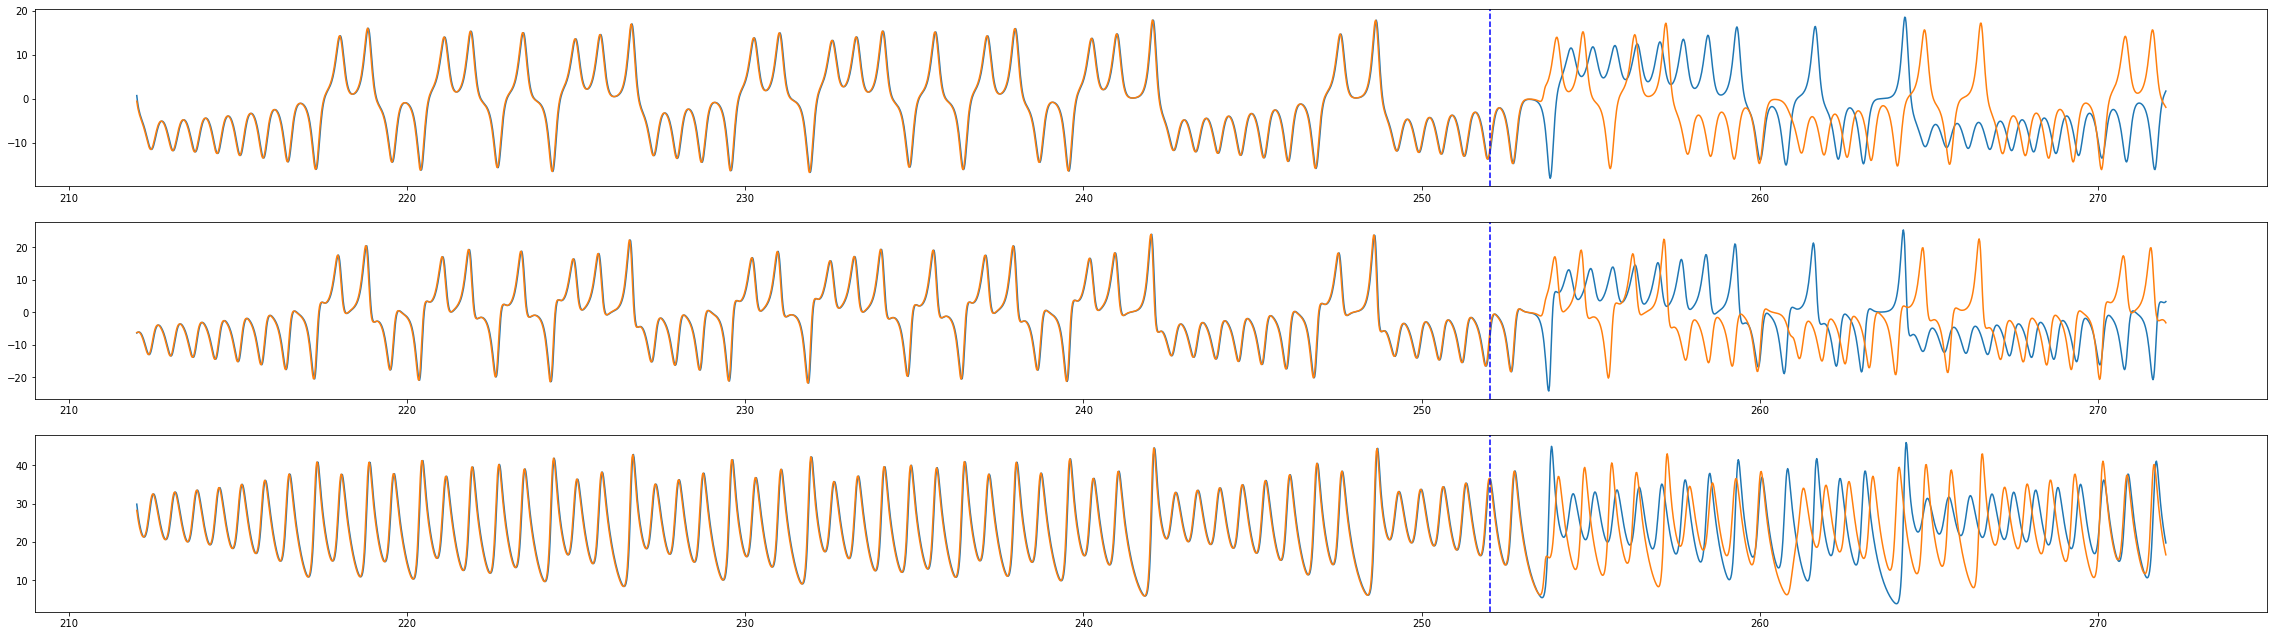

In [19]:
import torch
import numpy as np
import importlib
import utils

importlib.reload(utils)
# utils.plot_time_sequence(RC_lorenz.training_time,RC_lorenz.training_time+1000,RC_lorenz.training_time,RC_lorenz.f,torch.tensor(output_lorenz),torch.tensor(lorenz).T,time,3)
lorenz_time = np.linspace(0, RC_lorenz.run_time * RC_lorenz.d_t, RC_lorenz.run_time)

utils.plot_time_sequence(
    RC_lorenz.training_time - 2000,
    RC_lorenz.training_time + 1000,
    RC_lorenz.training_time,
    torch.tensor(output_lorenz),
    torch.tensor(data),
    lorenz_time,
    3,
)

# import numpy as np
# import matplotlib.pyplot as plt
# fig2=plt.figure()
# fig2.set_figwidth(40)
# fig2.set_figheight(15)

# print(output[0])
# plt.subplot(311)
# plt.plot(time[1000:1200],lorenz_x[1000:1200])
# plt.plot(time[1000:1200],(output.T[0][1005-10:1205-10]))
# #plt.plot(time[1000:1200],forced_output.T[0][1005:1205])
# plt.subplot(312)
# plt.plot(time[1000:1200],lorenz_y[1000:1200])
# plt.plot(time[1000:1200],(output.T[1][1005-10:1205-10]))
# #plt.plot(time[1000:1200],forced_output.T[1][1005:1205])
# plt.subplot(313)
# plt.plot(time[1000:1200],lorenz_z[1000:1200])
# plt.plot(time[1000:1200],(output.T[2][1005-10:1205-10]))
# #plt.plot(time[1000:1200],forced_output.T[2][1005:1205])
# plt.show()

/home/bfish/projects/reservoir/model.py:110: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(
/home/bfish/projects/reservoir/model.py:118: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  + torch.tensor(feed_to_reservoir)
/home/bfish/projects/reservoir/model.py:114: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(
/home/bfish/projects/reservoir/model.py:109: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather t

[1.818664886135589, 1.7992155135001888, 1.7966717508396277, 1.7965594722327474, 1.79717290160602, 1.7948066068036959, 1.79304983492605, 1.7948566702053284, 1.7960054564793964, 1.7949055451665017]


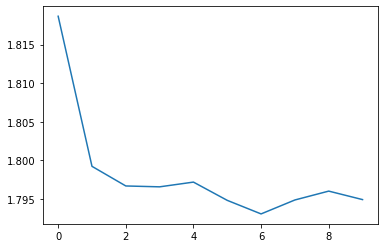

In [25]:
import qualification
importlib.reload(qualification)
loss_list = qualification.learning_curve(subtrained,test_length = 1400,data=data[len(data)-1400:])
print(loss_list)
plt.plot(range(10),loss_list)

In [31]:
importlib.reload(qualification)
lamda = qualification.lyapunov_estimate(RC_lorenz,data[0],delta_naught = 0.5,tests=20,measure_time=500,dimension = 4)
print(lamda)

0.003747503225787418


In [32]:
importlib.reload(qualification)
KR,GR,MC = qualification.config_space(RC_lorenz)
print(KR,GR,MC)

433 433 0


### MACKEY-GLASS TEST

In [ ]:

config_path = "mackey_glass.config"
with open(config_path) as config_file:
    config = json.load(config_file, object_pairs_hook=OrderedDict)

In [ ]:
# Generate data
# TODO: Maybe make a cached data file
data_mg, time_mg = utils.discrete_mackey_glass(
    epoch=config["system"]["length"],
    delta_t=config["system"]["d_t"]
)
print(f"{data_mg.shape=}")

In [ ]:
importlib.reload(utils)

RC_mg = ESNModel(config)
loss, loss_before_training = RC_mg.training(data_mg)
print(f"{loss_before_training=:.04f}")
print(f"{loss=:.04f}")

In [ ]:
output_mg,_ = RC_mg.run(data_mg,RC_mg.training_time,RC_mg.run_time-RC_mg.training_time)

In [ ]:
import torch
import numpy as np
import importlib
import utils
mg_time = np.linspace(0, RC_mg.run_time * RC_mg.d_t, RC_mg.run_time)
importlib.reload(utils)
# plot of train-and-auto-run
utils.plot_time_sequence(
    RC_mg.training_time - 2000,
    RC_mg.training_time + 2000,
    RC_mg.training_time,
    torch.tensor(output_mg),
    torch.tensor(data_mg),
    mg_time,
    1,
)



# utils.plot_time_sequence(0,RC.run_time,RC.f,p,s,time,1)